In [134]:
import networkx as nx
import re

import numpy as np

In [135]:
web_graph = nx.read_gpickle('web_graph.gpickle')

In [136]:
web_graph

In [137]:
web_graph.nodes[50]

{'pos': [0.8133465672903285, 0.5789147440078531],
 'page_content': 'Sports: Giddy Phelps Touches Gold for First Time Michael Phelps won the gold medal in the 400 individual medley and set a world record in a time of 4 minutes 8.26 seconds.'}

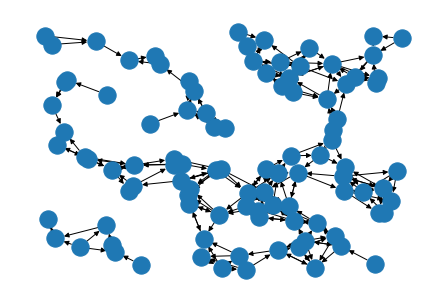

In [138]:
pos = {i: web_graph.nodes[i]['pos'] for i in range(len(web_graph.nodes))} 
nx.draw(web_graph, pos)

In [139]:
# Create a postings list
postings_list = {}
for i in range(len(web_graph.nodes)):
    node = web_graph.nodes[i]
    content = node['page_content']
    print(content)
    content = re.sub(r'[^\w\s]', '', content)
    content = re.sub(r'\s+', ' ', content)
    content = content.lower()
    # print(content)
    content = [c for c in content.split(' ') if c != '' and len(c) > 2]
    for word in content:
        if word not in postings_list:
            postings_list[word] = [i]
        elif postings_list[word][-1] != i:
            postings_list[word].append(i)

Business: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
Business: Retailers Vie for Back-To-School Buyers (Reuters) Reuters - Apparel retailers are hoping their\back-to-school fashions will make the grade among\style-conscious teens and young adults this fall, but it could\be a tough sell, with students and parents keeping a tighter\hold on their wallets.
Business: Dollar Briefly Hits 4-Wk Low Vs Euro  LONDON (Reuters) - The dollar dipped to a four-week low  against the euro on Monday before rising slightly on  profit-taking, but steep oil prices and weak U.S. data  continued to fan worries about the health of the world's  largest economy.
Business: Treasuries Slip as Stocks Rally  NEW YORK (Reuters) - U.S. Treasury debt prices slipped on  Monday, though traders characterized the move as profit-taking  rather than any fundamental change in sentiment.
Business: Dollar Rise

In [140]:
def generate_sets(query_word, postings_list):
    """
    Generates the root and base sets for the query word
    """
    if query_word not in postings_list:
        raise Exception('Word not in the postings list')
    root_set = postings_list[query_word]
    base_set = []
    for node in root_set:
        base_set.append(node)
    # print(root_set)
    root_set = set(root_set)
    # print(root_set)
    # print(base_set)
    base_set = set(base_set)
    # print(base_set)
    # print(web_graph.edges)
    for edge in web_graph.edges:
        if edge[0] in root_set:
            base_set.add(edge[1])
        if edge[1] in root_set:
            base_set.add(edge[0])
    # print(base_set)
    return root_set,base_set

In [141]:
def generate_adj_matrix(base_set):
    adj = np.zeros((len(base_set), len(base_set)))
    print(adj)
    bslist = list(base_set)
    print(bslist)
    for edge in web_graph.edges:
        if edge[0] in base_set and edge[1] in base_set:
            print(edge)
            adj[bslist.index(edge[0])][bslist.index(edge[1])] = 1
    print(adj)
    return adj


In [142]:
def generate_hub_authority_scores(adj_matrix):
    aTa = np.dot(adj_matrix.T, adj_matrix)
    aaT = np.dot(adj_matrix, adj_matrix.T)
    v, V = np.linalg.eig(aTa.T)
    left_vec = V[:, 0].T
    left_vec = V[:, v.argmax()]
    left_vec = left_vec / sum(left_vec)
    h_vec = np.reshape(left_vec, (1, -1))
    v, V = np.linalg.eig(aaT.T)
    left_vec = V[:, 0].T
    left_vec = V[:, v.argmax()]
    left_vec = left_vec / sum(left_vec)
    a_vec = np.reshape(left_vec, (1, -1))
    # Return the principal left eigenvector
    return a_vec, h_vec

In [146]:
rs,bs = generate_sets('business', postings_list)
print(rs)
print(len(rs))
print(bs)
print(len(bs))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
25
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 45, 46, 48, 49, 50, 51, 53, 54, 56, 58, 59, 61, 62, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 86, 87, 88, 90, 91, 93, 94, 95, 97, 98}
74


In [147]:
adjacencyList = generate_adj_matrix(bs)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 45, 46, 48, 49, 50, 51, 53, 54, 56, 58, 59, 61, 62, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 86, 87, 88, 90, 91, 93, 94, 95, 97, 98]
(0, 3)
(0, 61)
(1, 28)
(1, 54)
(1, 76)
(2, 67)
(3, 10)
(4, 9)
(4, 12)
(4, 23)
(4, 86)
(5, 25)
(6, 14)
(6, 22)
(6, 29)
(6, 36)
(7, 81)
(8, 66)
(9, 56)
(9, 78)
(9, 91)
(10, 0)
(10, 61)
(10, 75)
(11, 62)
(11, 65)
(12, 9)
(12, 86)
(12, 90)
(12, 91)
(12, 97)
(13, 48)
(13, 62)
(13, 65)
(13, 98)
(14, 22)
(14, 29)
(14, 36)
(14, 59)
(14, 93)
(15, 8)
(15, 17)
(15, 31)
(15, 66)
(15, 77)
(16, 69)
(16, 88)
(17, 66)
(18, 34)
(18, 61)
(18, 71)
(18, 86)
(19, 20)
(19, 39)
(20, 95)
(21, 50)
(21, 73)
(21, 76)
(22, 6)
(22, 14)
(22, 38)
(22, 56)
(23, 4)
(23, 58)
(23, 94)


In [149]:
authority, hub = generate_hub_authority_scores(adjacencyList)
print(authority)
print(len(authority[0]))
print(hub)
print(len(hub[0]))

[[ 2.11593959e-03 -1.13223905e-18  3.70907125e-18 -0.00000000e+00
   7.65104842e-02  1.30975371e-19  1.14437121e-03 -0.00000000e+00
   4.69366936e-20  1.25478158e-02  2.75548468e-03  1.07806415e-02
   6.86670380e-02  1.81407365e-02  5.03623841e-04  2.73822538e-20
  -0.00000000e+00  1.30793896e-20  2.06835976e-02 -3.91615408e-32
   2.83124266e-04  5.14850258e-19  8.91452923e-03  5.87959076e-02
   4.62249265e-20 -1.95063887e-22  4.27019343e-19  8.57710896e-05
   4.67517325e-19  1.82051363e-19 -2.46952318e-33 -0.00000000e+00
   2.62114655e-05  2.96138560e-02  8.82301431e-04 -2.85844751e-34
  -2.71703730e-34  3.04424506e-03  4.41660092e-02 -4.16407253e-58
   2.96876765e-20  2.66856527e-03 -5.06317554e-59  8.88159993e-19
   3.08995299e-02  9.66545853e-02  5.58309672e-05  9.23130145e-04
   5.57768102e-03  7.10747229e-03  3.00674727e-21 -3.74793329e-21
   3.72014737e-02 -0.00000000e+00  9.23130145e-04  5.43991445e-03
   2.63818101e-19 -0.00000000e+00  3.72651521e-03  5.55650689e-20
   1.56762